In [7]:
import networkx as nx
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

**E4.1  Erdös Renyí connectivity**

In the $G(n, p)$ Erdos-Renyi-model, a graph with $n$ edges is constructed by con-
necting nodes randomly. Each edge is included in the graph with probability $p$
independent from every other edge.
Check the statement that almost every graph in $G(n, 2 ln(n)/n)$ is connected.
Meaning that as n tends to infinity, the probability of a graph on n vertices
with edge probability $2 ln(n)/n$ being connected tends to one.
You can proceed as follows:

a)  Up to a moderately high number of n (n = 100 should be enough, why
not more nodes?) create a sufficiently high number of Erd ̋os-R ́enyi-graphs
(around 1000 should be ok).

b)  Investigate how many connected components each of these graphs has and
average over all graphs for a given n.

c)  Plot the average number of connected components over n. Does the behaviour of the number of connected components support the above statement? How long does it take to create an Erd ̋os-R ́enyi-Graph of size n?

current size: 0
current size: 1
current size: 2
current size: 3
current size: 4
current size: 5
current size: 6
current size: 7
current size: 8
current size: 9
current size: 10
current size: 11
current size: 12
current size: 13
current size: 14
current size: 15
current size: 16
current size: 17
current size: 18
current size: 19
current size: 20
current size: 21
current size: 22
current size: 23
current size: 24
current size: 25
current size: 26
current size: 27
current size: 28
current size: 29


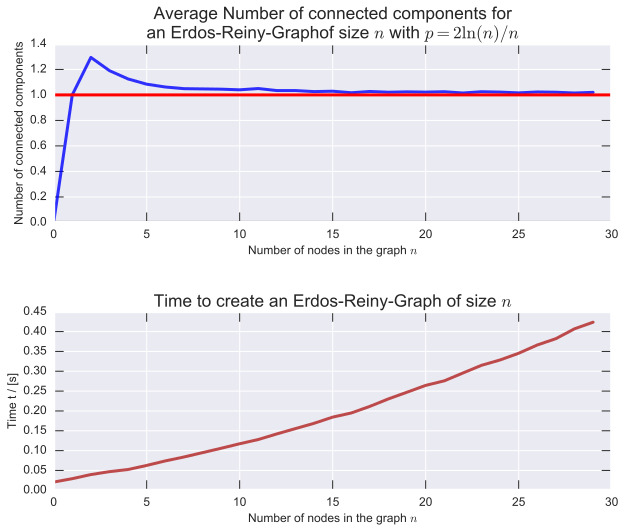

In [8]:

import time


connected_components = []
time_consumed = []

max_graph_size = 30

for size in range(max_graph_size):
    step_start = time.clock()
    print("current size: %d"%size)
    probability = 2*np.log(size)/size
    temp = []
    for i in range(1000):
        G = nx.erdos_renyi_graph(size,probability)
        temp.append(len(list(nx.connected_components(G))))
    connected_components.append(np.asarray(temp).mean())
    step_stop = time.clock()
    time_consumed.append(step_stop - step_start)

fig, axes = plt.subplots(nrows=2, ncols=1)
ax1 = axes[0]
ax2 = axes[1]

axes[0].set_title('Average Number of connected components for\nan Erdos-Reiny-Graph'+\
'of size $n$ with $p=2\\ln(n)/n$')
ax1.set_ylabel('Number of connected components')
ax1.set_xlabel('Number of nodes in the graph $n$')    
ax1.plot((0, max_graph_size), (0, 0), 'k-')   
ax1.plot(connected_components,color='blue',linewidth=3,alpha=0.8)
ax1.plot([0,30],[1,1], 'r-')


ax2.set_title('Time to create an Erdos-Reiny-Graph of size $n$')
ax2.set_ylabel('Time t / [s]')
ax2.set_xlabel('Number of nodes in the graph $n$')
ax2.plot(time_consumed,color='FireBrick',linewidth=3,alpha=0.8)

fig.subplots_adjust(hspace=0.5)

plt.savefig("erdos_reiny_graph.pdf")

        



**E4.2 Scale free degre distribution**

**a)** Create a Barabasi-Albert random graph with $|V|>500$ and plot the degree distribution using **plt.hist** or **np.histogram**. 

In [9]:
G=nx.barabasi_albert_graph(1000,5)

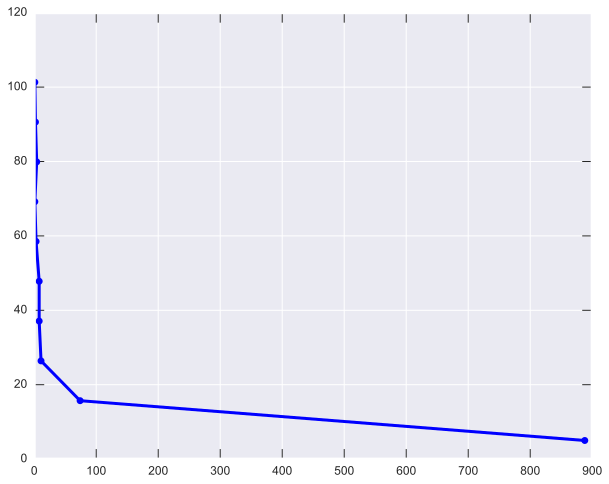

In [10]:
x,y=np.histogram(list(G.degree().values()))
plt.plot(x, y[:-1], 'bo-')

**b)** Find out what kind of function fits the degree distribution best. (*Hint: Try semi/doubly logarithmic plots*)

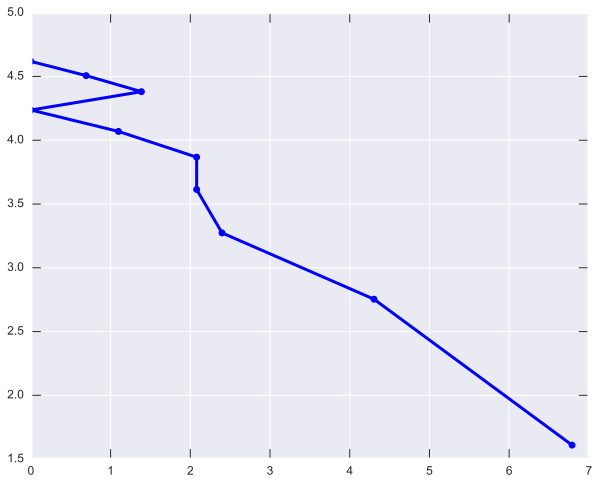

In [11]:
plt.plot(np.log(x), np.log(y[:-1]), 'bo-')

**E4.3 Average shortest path length scaling: small world**

**a)** networkx provides these two functions to generate radom graphs:
*  nx.erdos_renyi_graph(nnode, p)
*  nx.barabasi_albert_graph(nnode, m)

Find out how the number of edges scales with $p$ and $m$ in these cases respectively. 

**b)** Write a function that generates one Erdos-Renyi graph and one Barabasi-Albert graph with $N$ nodes and  (approximately) $6N$ edges. Vary $N$ in about 10 stepsizes  between 100 and 500. Check which random graph has smalles average shortest path length: Erdos-Renyi or Barabasi-Albert.

In [14]:
def gen_er_ba(nnode, nedge):
    p=2*nedge/(nnode*(nnode-1))
   
    g_er=nx.erdos_renyi_graph(nnode, p)
        
    m=(nnode-np.sqrt(nnode**2-4*nedge))/2
    g_ba=nx.barabasi_albert_graph(nnode, int(m))
    
    return g_er, g_ba

def comp_er_ba(nsizearr, kfac):
    er_arr=[]
    ba_arr=[]
    
    
    for nnode in nsizearr:
        g_er, g_ba=gen_er_ba(nnode, nnode*kfac)
        
        er_arr.append(nx.average_shortest_path_length(g_er))
        ba_arr.append(nx.average_shortest_path_length(g_ba))
    
     #   print (g_er.size(), g_er.order())
      #  print (g_ba.size(), g_ba.order())

    return er_arr, ba_arr
    

In [15]:
sizearr=np.arange(500,1000,100)
x,y=comp_er_ba(sizearr, 5)

NetworkXError: Graph is not connected.

In [ ]:
plt.plot(sizearr,x,label='er')
plt.plot(sizearr,y,label='ba')
plt.legend()

**E4.4 Robustness of graphs against attacks** 

Using the same function that you wrote in **E4.3 (b)**, check how many nodes when removed randomly from ER graph and BA graph with similar size and order to make the graph disconnected. Make a remark about which kind of graph is more robust against random attacks aginst nodes.

In [ ]:
def num_edge_before_disconnected(G):
    n=0
    while nx.is_connected(G):
        G.remove_node(np.random.choice(G.nodes()))
        n+=1
    return n

In [ ]:
res=[(num_edge_before_disconnected(g_er), num_edge_before_disconnected(g_ba)) for g_er, g_ba in \
 [gen_er_ba(nnode, nnode*6) for nnode in np.arange(100,500,10)]]

In [ ]:
x,y=[i for i in zip(*res)]

In [ ]:
plt.plot(x,y, 'go',x,x)
plt.xlabel("ER")
plt.ylabel("BA")